# Image Data Augmentation with Keras



Import Libraries

In [ ]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


Rotation

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

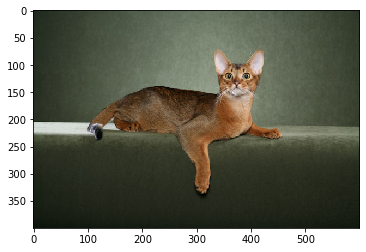

In [ ]:
image_path = 'images/train/cat/cat.jpg'
plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


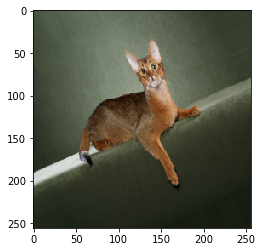

In [ ]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Width and Height Shifts

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
   width_shift_range = [-100, -50, 0, 50, 100],
   height_shift_range = [-50, 0, 50]
)

Found 1 images belonging to 1 classes.


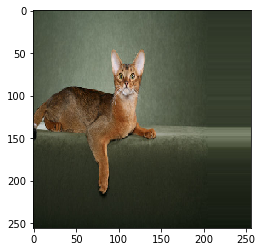

In [ ]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Brightness

Found 1 images belonging to 1 classes.


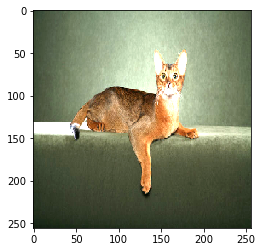

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.5, 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Shear Transformation

Found 1 images belonging to 1 classes.


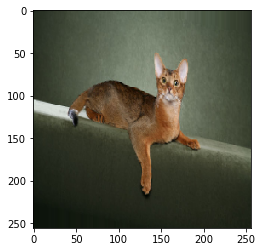

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range= 40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Zoom

Found 1 images belonging to 1 classes.


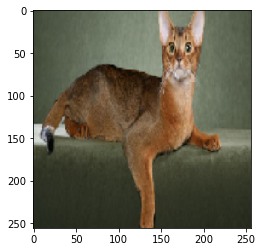

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = (0.5, 1.2)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Channel Shift

Found 1 images belonging to 1 classes.


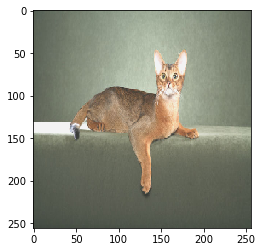

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Flips

Found 1 images belonging to 1 classes.


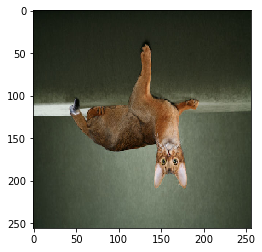

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Normalization

 Featurewise

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

In [ ]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.4982741 0.83136284 [[1]]
120.70756512369792


Samplewise

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-4.9670536e-08 0.99999994 [[9]]


Rescale and Preprocessing Function

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [ ]:
print(x.mean(), x.std(), y)

0.0057266303 0.47551182 [[6]]


Using in Model Training

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 30
)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, input_shape = (32,32,3),
        pooling = 'avg'
    ),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size = 32),
    epochs = 2, steps_per_epoch= 10
)

  ...
    to  
  ['...']
Train for 10 steps
Epoch 1/2
10/10 [==============================] - 5s 453ms/step - loss: 2.9889 - accuracy: 0.2062
Epoch 2/2
10/10 [==============================] - 4s 442ms/step - loss: 2.6146 - accuracy: 0.2156
